In [ ]:
#importing all libs
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# loading the facial key point data
points_df = pd.read_csv('KeyFacialPoints.csv')

In [ ]:
# display all the values of the csv file
points_df

In [ ]:
# display information about data
points_df.info()

In [ ]:
# display image data
points_df['Image'][1]

In [ ]:
# As values in dataset is csv format are in string and seperated by spaces converting them using numpy and reshapeing the image size
points_df['Image']=points_df['Image'].apply(lambda x: np.fromstring(x, dtype=int,sep=' ').reshape(96,96))

In [ ]:
# verify image size
points_df['Image'][1].shape

In [ ]:
# verify no null values are present
points_df.isnull().sum()

In [ ]:
# Display the mean,max and min of values in dataset
points_df.describe()

In [ ]:
# Display random image using numpy and matplotlib
# Using Grayscale images in dataset
i= np.random.randint(1, len(points_df))
plt.imshow(points_df['Image'][i],cmap='gray')

In [ ]:
# Ploting all key points on face
# using loop to plot all [x,y] cordinates to show each key point
plt.figure()
plt.imshow(points_df['Image'][i],cmap='gray')
for j in range(1,31,2):
    plt.plot(points_df.loc[i][j-1],points_df.loc[i][j],'rx')

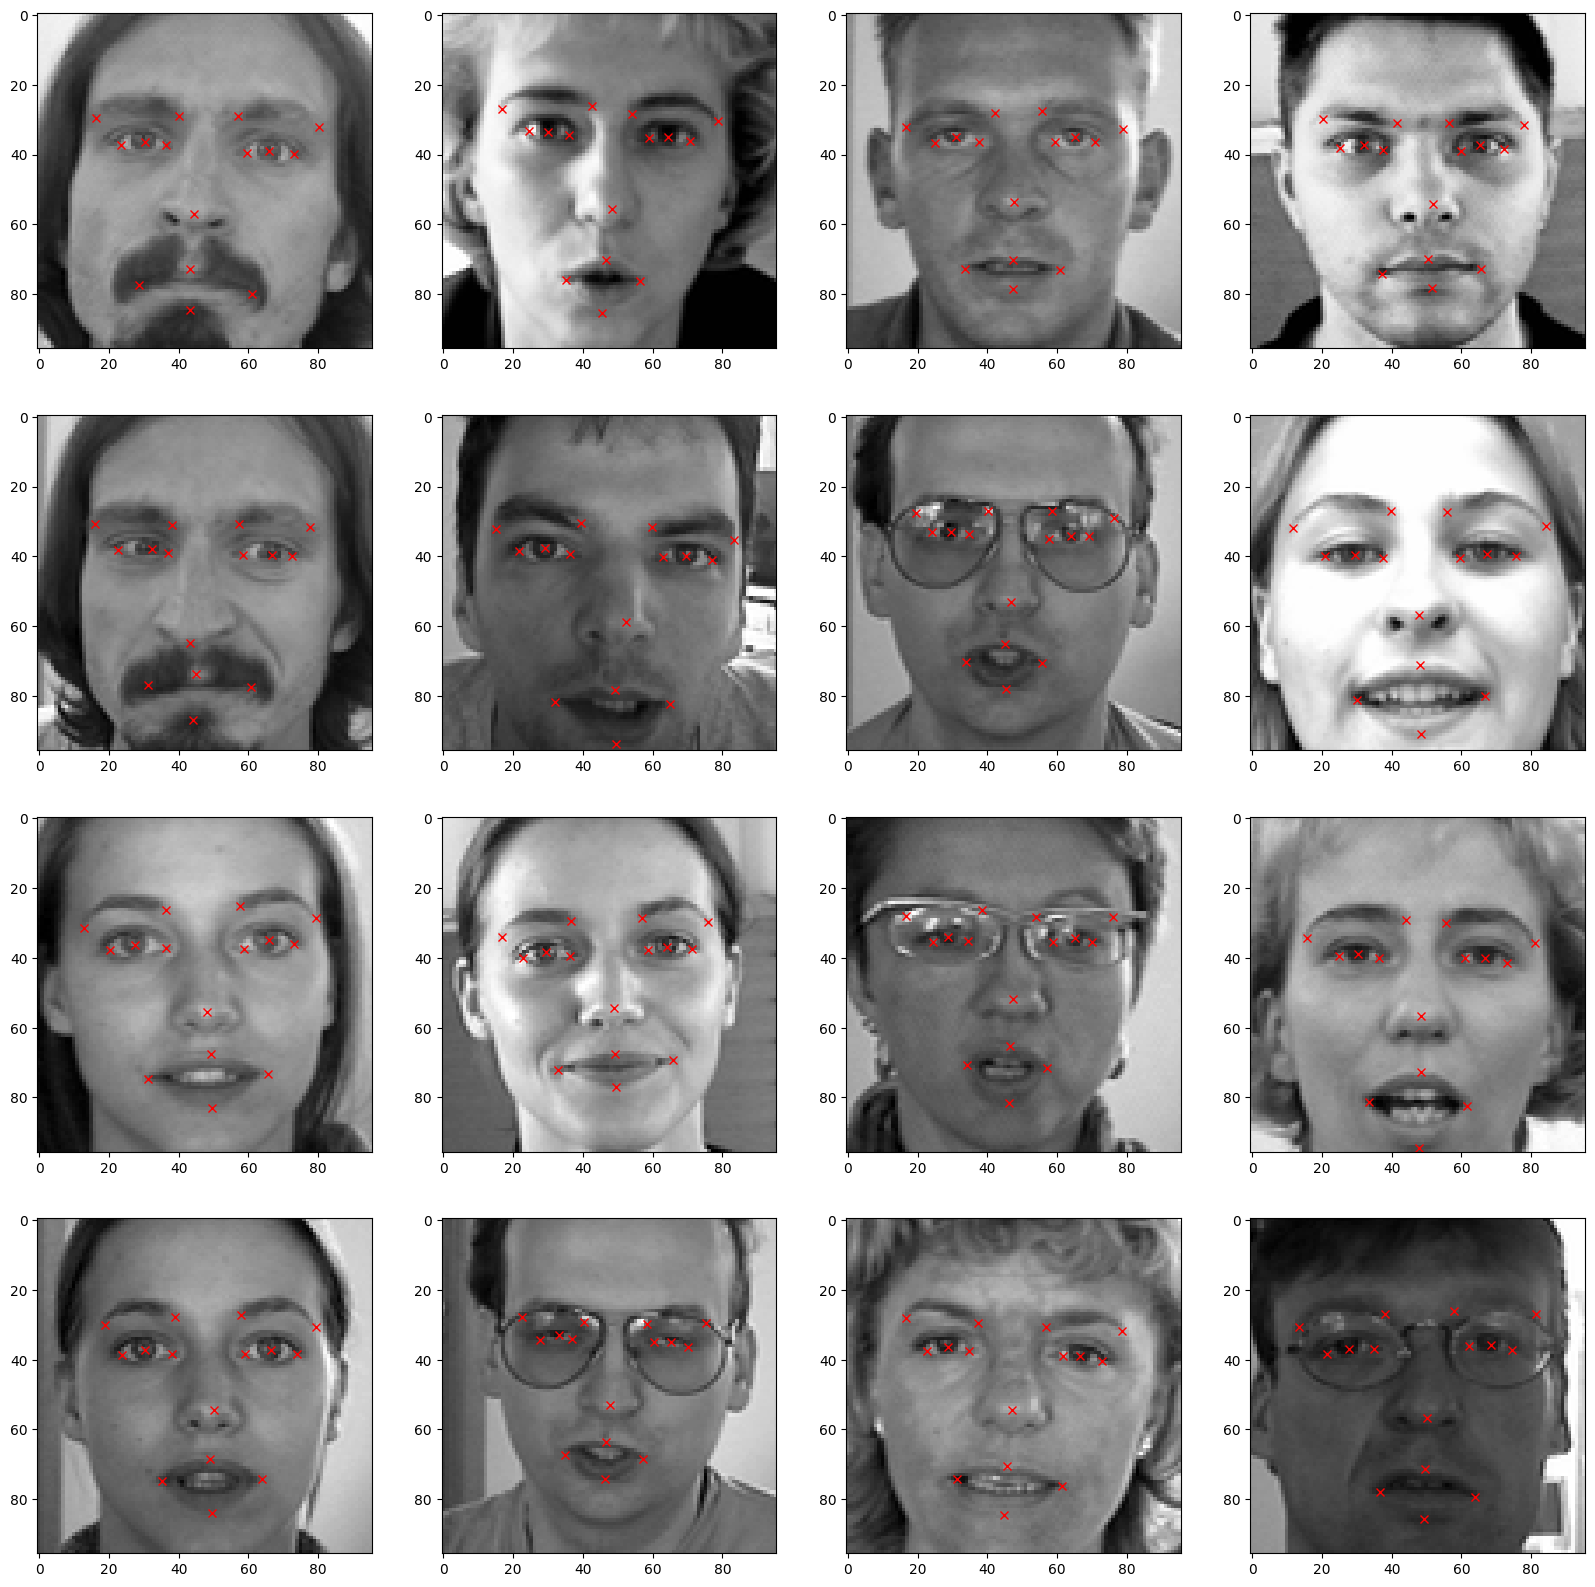

In [34]:
import random
fig=plt.figure(figsize=(20,20))
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    image=plt.imshow(points_df['Image'][i],cmap='gray')
    for j in range(1,31,2):
        plt.plot(points_df.loc[i][j-1],points_df.loc[i][j],'rx')